
Order of track access:  [276, 338, 236, 112, 56, 48, 46]
Total head movement:  374
Total seek time:  1890.0


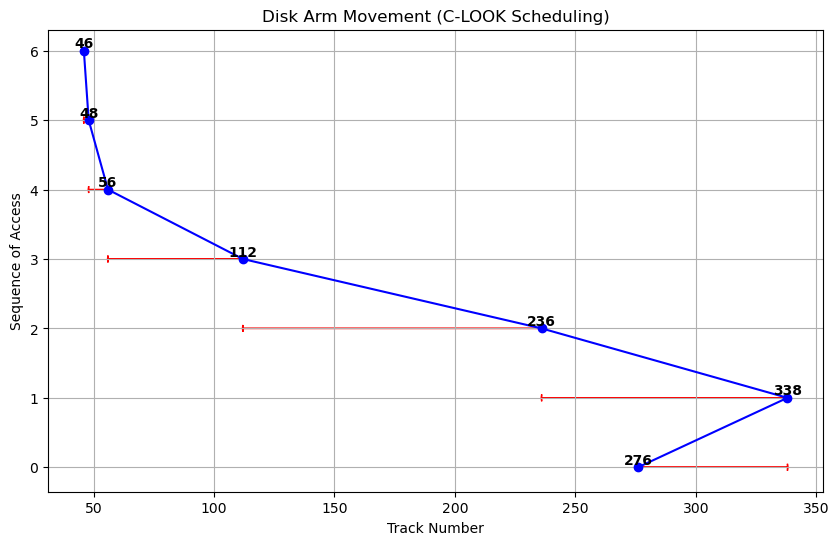

In [4]:
import matplotlib.pyplot as plt

class DiskArm:
    def __init__(self, initial_position, max_track):
        self.current_position = initial_position
        self.total_head_movement = 0
        self.seek_time = 0
        self.max_track = max_track  # Maximum track number on the disk

    def move_to(self, target_track):
        # Calculate the movement from the current position to the target track
        movement = abs(self.current_position - target_track)
        self.total_head_movement += movement
        self.current_position = target_track
        return movement


def process_requests(initial_position, requests, seek_rate, max_track, alpha):
    # Sort requests into upper and lower halves based on the initial position
    lower_half = [req for req in requests if req < initial_position]
    upper_half = [req for req in requests if req >= initial_position]
    
    # Sort both halves
    lower_half.sort(reverse=True)  # Lower half in reverse order
    upper_half.sort()  # Upper half in ascending order
    
    # Combine the service order: first upper, then lower (wrap around)
    service_order = upper_half + lower_half
    
    # Create a DiskArm object with the initial position
    disk_arm = DiskArm(initial_position, max_track)
    
    # Store the order of tracks accessed and movements
    tracks_accessed = []
    movements = []
    
    # Process each request in the order they are received
    for request in service_order:
        movement = disk_arm.move_to(request)
        tracks_accessed.append(request)
        movements.append(movement)
    
    # Calculate the seek time
    seek_time = disk_arm.total_head_movement * seek_rate + alpha
    
    # Return the total head movement, seek time, and the tracks accessed
    return disk_arm.total_head_movement, seek_time, tracks_accessed, movements


def plot_disk_arm_movement(requests, movements):
    # Create a simple plot to visualize the movement of the disk arm
    plt.figure(figsize=(10, 6))
    
    # Plot the track numbers (X-axis) and the sequence of accesses (Y-axis)
    plt.plot(requests, range(len(requests)), marker='o', linestyle='-', color='b', label='Track Accessed')
    
    # Plot arrows showing the movement from one track to the next
    for i in range(len(requests) - 1):
        plt.arrow(requests[i], i,  # From the previous point
                  requests[i+1] - requests[i], 0,  # To the next point (horizontal movement)
                  head_width=0.1, head_length=0.2, fc='r', ec='r')

    # Annotate each track position with its number
    for i, track in enumerate(requests):
        plt.text(track, i + 0.1, str(track), ha='center', va='center', fontweight='bold')

    plt.title("Disk Arm Movement (C-LOOK Scheduling)")
    plt.xlabel("Track Number")
    plt.ylabel("Sequence of Access")
    plt.grid(True)
    
    # Show the plot
    plt.show()


def main():
    # Input initial disk arm position
    initial_position = int(input("Enter the initial position of the disk arm: "))
    
    # Validate the initial position
    if initial_position < 0:
        print("Initial position must be a non-negative integer.")
        return

    # Input track requests
    requests = list(map(int, input("Enter the track requests (separated by spaces): ").split()))
    
    # Input maximum track number
    max_track = int(input("Enter the maximum track number on the disk: "))
    
    # Validate the maximum track number
    if max_track <= 0:
        print("Maximum track number must be a positive integer.")
        return
    
    # Validate track requests to be within range
    for request in requests:
        if request < 0 or request > max_track:
            print(f"Invalid track request: {request}. It must be between 0 and {max_track}.")
            return
    
    # Input seek rate (how much time is needed to move 1 unit of track)
    seek_rate = float(input("Enter the seek rate (time units per track move): "))
    
    # Validate seek rate
    if seek_rate <= 0:
        print("Seek rate must be a positive value.")
        return
    
    # Input alpha value (additional movement after reaching the end)
    alpha = float(input("Enter the alpha value (additional movement after reaching the end): "))
    
    # Validate alpha
    if alpha < 0:
        print("Alpha value must be a non-negative value.")
        return
    
    # Process the requests
    total_head_movement, seek_time, tracks_accessed, movements = process_requests(initial_position, requests, seek_rate, max_track, alpha)
    
    # Display results
    print("\nOrder of track access: ", tracks_accessed)
    print("Total head movement: ", total_head_movement)
    print("Total seek time: ", seek_time)
    
    # Visualize the disk arm movement
    plot_disk_arm_movement(tracks_accessed, movements)


if __name__ == "__main__":
    main()